## Astronomy 534 "Extragalactic Universe" (Winter 2025)

### The Universe Machine

The [Universe Machine](https://bitbucket.org/pbehroozi/universemachine/src/main/) is a suite of codes written by Peter Behroozi to explore the connection between observed galaxies and simulated dark matter halos. The observational data repository is [here](https://www.peterbehroozi.com/data.html).

Start with the [description of the model](https://bitbucket.org/pbehroozi/universemachine/src/main/README.md). For example, the stellar mass - halo mass relation is [here](https://bitbucket.org/pbehroozi/universemachine/src/main/README.md#markdown-header-stellar-mass-halo-mass-relations). I uploaded the median fits for the SMHM relation in Canvas `Files/Data/UniverseMachine/smhm`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('mplstyle.txt')

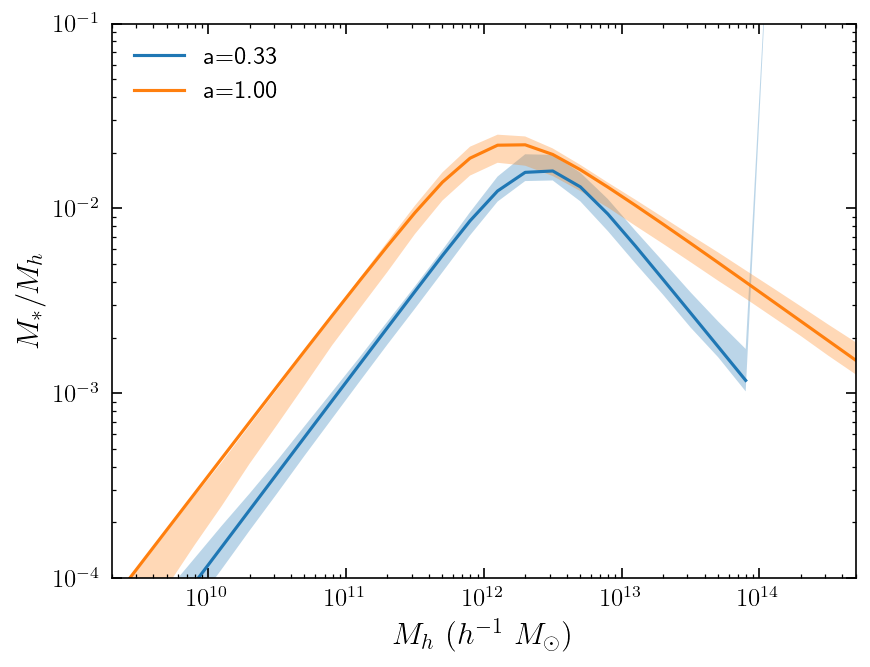

In [2]:
path = '../UniverseMachine/umachine-dr1/data/smhm/median_fits/'

#HM(0) Med_All(1) Err+(2) Err-(3) Med_Cen(4) Err+(5) Err-(6) Med_Cen_SF(7) Err+(8) Err-(9)
#Med_Cen_Q(10) Err+(11) Err-(12) Med_Sat(13) Err+(14) Err-(15) Med_SF(16) Err+(17) Err-(18)
#Med_Q(19) Err+(20) Err-(21) True_Med_All(22) Err+(23) Err-(24) True_Cen(25) Err+(26)
#Err-(27) True_Cen_SF(28) Err+(29) Err-(30) True_Cen_Q(31) Err+(32) Err-(33) True_Sat(34)
#Err+(35) Err-(36) True_SF(37) Err+(38) Err-(39) True_Q(40) Err+(41) Err-(42) 

for a in [ '0.334060', '1.002312' ]:
    logMh, logSMHM, errp, errm = np.loadtxt(path+'smhm_a'+a+'.dat',\
                                            usecols=(0,25,26,27), unpack=True)
    plt.fill_between(10**logMh, 10**(logSMHM-errm), 10**(logSMHM+errp), alpha=0.3)
    trim = logSMHM < 0
    plt.plot(10**logMh[trim], 10**logSMHM[trim], label="a="+a[:4])

plt.xlabel(r'$M_h \ (h^{-1}\ M_\odot)$')
plt.ylabel(r'$M_*/M_h$')
plt.xlim(2e9, 5e14)
plt.ylim(1e-4, 1e-1)
plt.loglog()
plt.legend();

Halo mass functions are in `Files/Data/UniverseMachine/hmfs`:

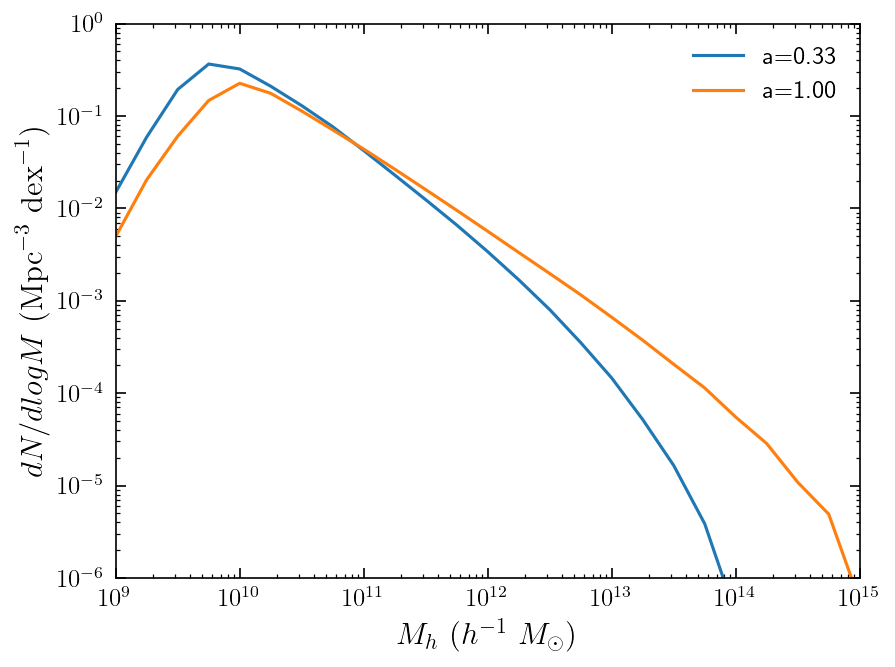

In [3]:
path = '../UniverseMachine/umachine-dr1/data/hmfs/'

#Peak halo masses in Msun
#Number densities in comoving Mpc^-3 dex^-1
#Log10(HM) Number_Density Err+ Err- Satellite_fraction Err+ Err- HM_Left_Edge HM_Right_Edge

for a in [ '0.334060', '1.002310' ]:
    logMh, nm = np.loadtxt(path+'hmf_a'+a+'.dat', usecols=(0,1), unpack=True)
    plt.plot(10**logMh, nm, label="a="+a[:4])

plt.xlabel(r'$M_h \ (h^{-1}\ M_\odot)$')
plt.ylabel(r'$dN/dlogM \ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')
plt.xlim(1e9, 1e15)
plt.ylim(1e-6, 1)
plt.loglog()
plt.legend();